# AI-BAsed Crop Health Capstone Project

## Task: 1 - Data Understanding

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load dataset
df = pd.read_csv("/content/Synthetic Multispectral Crops Data - Sheet1.csv")

# Basic info
df.info(), df.head()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1200 entries, 0 to 1199
Data columns (total 16 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   ndvi_mean          1200 non-null   float64
 1   ndvi_std           1200 non-null   float64
 2   ndvi_min           1200 non-null   float64
 3   ndvi_max           1200 non-null   float64
 4   gndvi              1200 non-null   float64
 5   savi               1200 non-null   float64
 6   evi                1200 non-null   float64
 7   red_edge_1         1200 non-null   float64
 8   red_edge_2         1200 non-null   float64
 9   nir_reflectance    1200 non-null   float64
 10  soil_brightness    1200 non-null   float64
 11  canopy_density     1200 non-null   float64
 12  moisture_index     1200 non-null   float64
 13  grid_x             1200 non-null   int64  
 14  grid_y             1200 non-null   int64  
 15  crop_health_label  1200 non-null   object 
dtypes: float64(13), int64(2)

(None,
    ndvi_mean  ndvi_std  ndvi_min  ndvi_max     gndvi      savi       evi  \
 0   0.462178  0.118574  0.345162  0.527650  0.434070  0.493184  0.426272   
 1   0.865500  0.023196  0.814436  1.056953  0.855039  0.887622  0.807505   
 2   0.712396  0.022876  0.539486  0.881657  0.628224  0.721757  0.708308   
 3   0.619061  0.062069  0.515087  0.696248  0.578767  0.609120  0.640899   
 4   0.309213  0.083524  0.178098  0.466014  0.357456  0.357234  0.434805   
 
    red_edge_1  red_edge_2  nir_reflectance  soil_brightness  canopy_density  \
 0    0.538210    0.387860         0.715725         0.531091        0.586647   
 1    0.200828    0.391693         0.350926         0.304631        0.418664   
 2    0.139121    0.474993         0.479509         0.394532        0.829622   
 3    0.494059    0.354945         0.555526         0.594686        0.882743   
 4    0.517743    0.152411         0.767144         0.781283        0.916408   
 
    moisture_index  grid_x  grid_y crop_health_

In [3]:
# Check missing values
df.isnull().sum()


,0
ndvi_mean,0
ndvi_std,0
ndvi_min,0
ndvi_max,0
gndvi,0
savi,0
evi,0
red_edge_1,0
red_edge_2,0
nir_reflectance,0


In [4]:
# Statistical summary
df.describe()


,ndvi_mean,ndvi_std,ndvi_min,ndvi_max,gndvi,savi,evi,red_edge_1,red_edge_2,nir_reflectance,soil_brightness,canopy_density,moisture_index,grid_x,grid_y
count,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000
mean,0.549409,0.084760,0.426339,0.673198,0.549456,0.548230,0.547482,0.347123,0.353908,0.548972,0.445149,0.651057,0.548473,9.555833,9.512500
std,0.206205,0.037428,0.209405,0.210139,0.209522,0.210656,0.217635,0.143147,0.143760,0.204472,0.206082,0.204135,0.259727,5.793662,5.813749
min,0.203242,0.020203,0.021354,0.265189,0.085060,0.119313,0.068225,0.100120,0.101227,0.200110,0.100934,0.300388,0.100279,0.000000,0.000000
25%,0.366633,0.052097,0.247114,0.487883,0.366233,0.365079,0.369241,0.224678,0.232504,0.368337,0.264461,0.468347,0.327327,5.000000,4.000000
50%,0.556761,0.085807,0.435165,0.670934,0.550906,0.546413,0.553370,0.346752,0.353218,0.543587,0.438322,0.649936,0.545526,10.000000,10.000000
75%,0.729287,0.115859,0.602736,0.852604,0.719411,0.727774,0.733130,0.470124,0.479491,0.730997,0.623496,0.835916,0.775092,15.000000,15.000000
max,0.899802,0.149924,0.835727,1.087604,0.972632,0.974679,1.030173,0.599753,0.599837,0.899089,0.799191,0.999864,0.999932,19.000000,19.000000


In [5]:
vegetation_indices = {
    "NDVI": "Indicates overall plant health and chlorophyll content",
    "GNDVI": "Sensitive to nitrogen and chlorophyll concentration",
    "SAVI": "Reduces soil brightness effects in sparse vegetation",
    "EVI": "Improves sensitivity in high biomass regions",
    "RedEdge": "Early indicator of plant stress before visible damage",
    "CanopyDensity": "Represents crop coverage and growth stage",
    "MoistureIndex": "Indicates water stress and irrigation issues"
}

pd.DataFrame.from_dict(vegetation_indices, orient="index", columns=["Role"])


,Role
NDVI,Indicates overall plant health and chlorophyll...
GNDVI,Sensitive to nitrogen and chlorophyll concentr...
SAVI,Reduces soil brightness effects in sparse vege...
EVI,Improves sensitivity in high biomass regions
RedEdge,Early indicator of plant stress before visible...
CanopyDensity,Represents crop coverage and growth stage
MoistureIndex,Indicates water stress and irrigation issues


## Task  2: Machine Learning Model

In [6]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, roc_auc_score


In [9]:
df.head()

,ndvi_mean,ndvi_std,ndvi_min,ndvi_max,gndvi,savi,evi,red_edge_1,red_edge_2,nir_reflectance,soil_brightness,canopy_density,moisture_index,grid_x,grid_y,crop_health_label
0,0.462178,0.118574,0.345162,0.527650,0.434070,0.493184,0.426272,0.538210,0.387860,0.715725,0.531091,0.586647,0.679785,9,0,Healthy
1,0.865500,0.023196,0.814436,1.056953,0.855039,0.887622,0.807505,0.200828,0.391693,0.350926,0.304631,0.418664,0.926373,4,8,Healthy
2,0.712396,0.022876,0.539486,0.881657,0.628224,0.721757,0.708308,0.139121,0.474993,0.479509,0.394532,0.829622,0.443202,6,7,Healthy
3,0.619061,0.062069,0.515087,0.696248,0.578767,0.609120,0.640899,0.494059,0.354945,0.555526,0.594686,0.882743,0.788671,4,5,Healthy
4,0.309213,0.083524,0.178098,0.466014,0.357456,0.357234,0.434805,0.517743,0.152411,0.767144,0.781283,0.916408,0.637918,14,19,Healthy


In [10]:
# Feature & target split
X = df.drop(columns=["crop_health_label"], axis=1)
y = df["crop_health_label"]

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.25, random_state=42, stratify=y
)


In [11]:
# Feature scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [12]:
# Train model
model = RandomForestClassifier(
    n_estimators=200,
    max_depth=10,
    random_state=42
)
model.fit(X_train_scaled, y_train)


RandomForestClassifier(max_depth=10, n_estimators=200, random_state=42)

In [13]:
# Predictions
y_pred = model.predict(X_test_scaled)
y_proba = model.predict_proba(X_test_scaled)


In [25]:
# Evaluation
print(classification_report(y_test, y_pred))


class_labels = model.classes_


if 'Stressed' in class_labels:
    positive_class_index = list(class_labels).index('Stressed')
else:
    positive_class_index = 1

roc_auc = roc_auc_score(y_test, y_proba[:, positive_class_index])
print("ROC-AUC Score:", roc_auc)

              precision    recall  f1-score   support

     Healthy       0.95      0.93      0.94       195
    Stressed       0.87      0.90      0.89       105

    accuracy                           0.92       300
   macro avg       0.91      0.92      0.91       300
weighted avg       0.92      0.92      0.92       300

ROC-AUC Score: 0.9787057387057386


## Task 3: Spatial Aggregation & Stress Heatmap

In [16]:
# Add predictions back to dataframe
df["Predicted_Stress"] = model.predict(scaler.transform(X))


In [17]:
# Create synthetic spatial grid
df["x_coord"] = np.random.randint(0, 100, size=len(df))
df["y_coord"] = np.random.randint(0, 100, size=len(df))


In [26]:
# Grid aggregation
grid_size = 10
df["x_grid"] = df["x_coord"] // grid_size
df["y_grid"] = df["y_coord"] // grid_size


df["Predicted_Stress_Numeric"] = df["Predicted_Stress"].apply(lambda x: 1 if x == "Stressed" else 0)

grid_stress = (
    df.groupby(["x_grid", "y_grid"])["Predicted_Stress_Numeric"]
    .mean()
    .reset_index()
)

grid_stress = grid_stress.rename(columns={"Predicted_Stress_Numeric": "Mean_Stress_Level"})

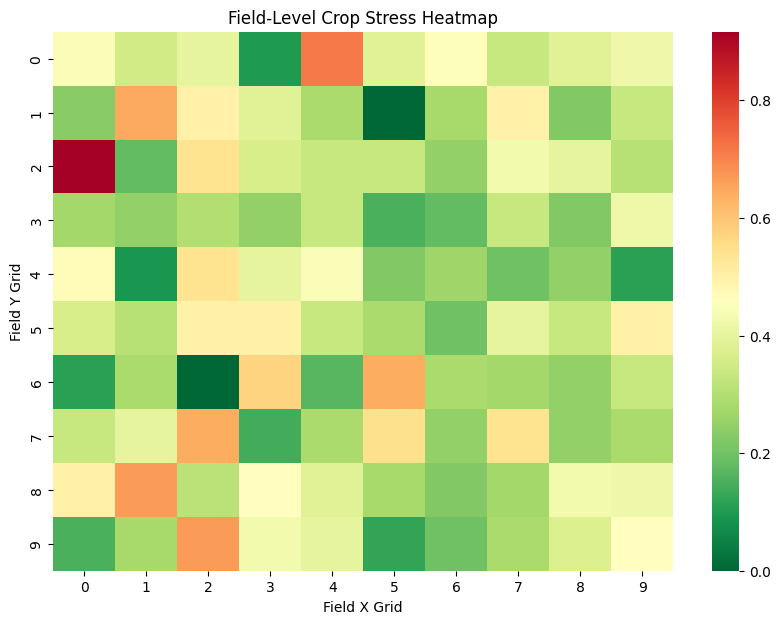

In [21]:
# Heatmap visualization
heatmap_data = grid_stress.pivot(
    index="y_grid",
    columns="x_grid",
    values="Mean_Stress_Level"
)

plt.figure(figsize=(10, 7))
sns.heatmap(heatmap_data, cmap="RdYlGn_r", annot=False)
plt.title("Field-Level Crop Stress Heatmap")
plt.xlabel("Field X Grid")
plt.ylabel("Field Y Grid")
plt.show()

##Task 4: Drone & Agronomy Interpretation

In [23]:
def drone_recommendation(stress_value):
    if stress_value < 0.5:
        return "Routine monitoring (weekly)"
    elif stress_value < 1.5:
        return "Targeted inspection (2–3 days)"
    else:
        return "Immediate drone & field inspection"

grid_stress["Drone_Action"] = grid_stress["Mean_Stress_Level"].apply(drone_recommendation)
grid_stress.head()

,x_grid,y_grid,Mean_Stress_Level,Drone_Action
0,0,0,0.444444,Routine monitoring (weekly)
1,0,1,0.235294,Routine monitoring (weekly)
2,0,2,0.916667,Targeted inspection (2–3 days)
3,0,3,0.272727,Routine monitoring (weekly)
4,0,4,0.470588,Routine monitoring (weekly)


##Task 5: Reflection

In [24]:
reflection = """
LIMITATIONS:
- Dataset is synthetic and lacks real seasonal variations
- No weather, soil, or crop-type data included
- Spatial coordinates are simulated
- Stress labels may not reflect true agronomic thresholds

IMPROVEMENTS:
- Integrate real drone GPS-based orthomosaic data
- Include weather, irrigation, and soil nutrient data
- Use time-series vegetation indices
- Apply deep learning (CNNs) on raw multispectral imagery
- Deploy real-time stress dashboards using GIS platforms
"""

print(reflection)



LIMITATIONS:
- Dataset is synthetic and lacks real seasonal variations
- No weather, soil, or crop-type data included
- Spatial coordinates are simulated
- Stress labels may not reflect true agronomic thresholds

IMPROVEMENTS:
- Integrate real drone GPS-based orthomosaic data
- Include weather, irrigation, and soil nutrient data
- Use time-series vegetation indices
- Apply deep learning (CNNs) on raw multispectral imagery
- Deploy real-time stress dashboards using GIS platforms

